In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

# Clustering for EastWestAirlines

In [44]:
Airlines = pd.read_csv("EastWestAirlines_n.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airlines.shape

(3999, 12)

In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# AgglomerativeClustering to airline dataset

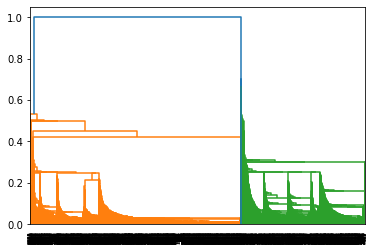

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

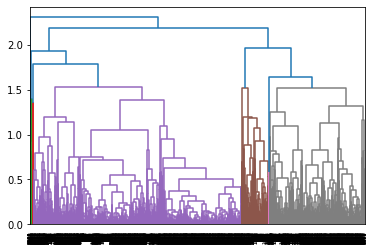

In [7]:
dendrogram1 = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,1
1,1
2,1
3,1
4,0


In [10]:
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [11]:
df_norm['h_clusterid'] = hc.labels_
df_norm['h_clusterid'].head()

0    1
1    1
2    1
3    1
4    0
Name: h_clusterid, dtype: int64

# k-means method to airline dataset

In [53]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [54]:
Airlines = pd.read_csv("EastWestAirlines_n.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [55]:
# screw plot or elbow curve

k = list(range(2,15))
k

# variable for storing total within sum of squares for each kmeans
TWSS = []  
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    # variable for storing within sum of squares for each cluster
    WSS = []  
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2870fe7b3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

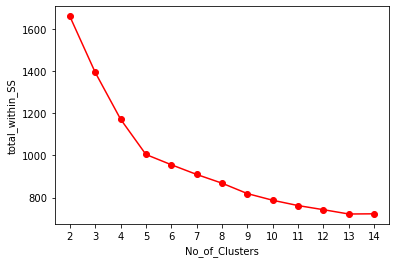

In [56]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [57]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters
model=KMeans(n_clusters=5).fit(df_norm)
model.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00, -1.11022302e-16],
       [ 2.92746776e-02,  8.04597701e-03,  3.07471264e-02,
         9.77011494e-03,  2.87356322e-04,  1.31611146e-02,
         8.03929431e-02,  7.89413516e-03,  1.37063544e-02,
         6.70570472e-01,  1.11022302e-15,  1.00000000e+00],
       [ 4.89939511e-02,  2.60651032e-02,  3.91207154e-02,
         1.63934426e-02,  2.23546945e-03,  3.21237515e-02,
         1.20611375e-01,  3.20060148e-02,  5.80097292e-02,
         5.23853453e-01,  1.00000000e+00, -1.44328993e-15],
       [ 1.94593252e-02,  8.48728732e-03,  1.74418605e-02,
         8.23643411e-03,  1.69573643e-03,  1.32701207e-02,
         7.26518839e-02,  7.89547725e-03,  1.24140705e-02,
         2.39497054e-01,  1.93798450e-03,  1.00290698e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.4603559

In [58]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Airlines['clust']=md # creating a  new column and assigning it to new column 
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [103]:
#re-arranging the order
Airlines=Airlines.iloc[:,[2,3]]
Airlines.iloc[:,0:7].groupby(Airlines.clust).mean() #aggregating for each cluster separately

IndexingError: Too many indexers

#  k means clustering for crime data

In [149]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [150]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [151]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime_data.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [152]:
# scree plot or elbow curve

k = list(range(2,15))
k

# variable for storing total within sum of squares for each kmeans
TWSS = []  
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    # variable for storing within sum of squares for each cluster
    WSS = []  
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2871012eee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

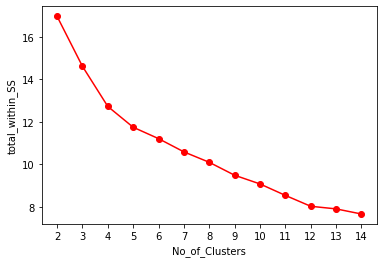

In [153]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [154]:
# from the above curve 5 clusters are formed

In [155]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters
model=KMeans(n_clusters=5).fit(df_norm)
model.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.36230637, 0.31409002, 0.54237288, 0.33554817],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.23493976, 0.33317025, 0.84503632, 0.22997416]])

In [156]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime_data['clust']=md # creating a  new column and assigning it to new column 
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [157]:
crime_data.iloc[:,1:5].groupby(crime_data.clust).mean() #aggregating for each cluster separately

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,10.966667,264.000000,76.500000,33.608333
1,2.680000,70.100000,51.000000,10.910000
2,6.814286,136.714286,64.000000,20.285714
3,14.671429,251.285714,54.285714,21.685714
4,4.700000,142.285714,81.857143,16.200000


# DBSCAN for crime dataset

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
crime_d = crime_data.iloc[:,1:]
crime_d.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [15]:
array=crime_d.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [16]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [20]:
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=4)

In [21]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [26]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [27]:
pd.concat([crime_d,c1],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
